In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.fftpack
import glob,os
import gwPaPa_func as gwpapa

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#from skimage.util.shape import view_as_windows

import tensorflow as tf
from tensorflow import keras

import pickle
from pycbc import frame,types
import timeit

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
###timer
start = timeit.default_timer()

In [3]:
BNS_test_path='data_BNS'
BNS_check_path='data_BNS_check'
BBH_test_path='data_BBH'
BBH_check_path='data_BBH_check'

In [4]:
injections_BNS = pickle.load(open(BNS_test_path+'/injections-BNS.p', "rb"))
injections_BBH = pickle.load(open(BBH_test_path+'/injections-BBH.p', "rb"))
injections_BNS_check = pickle.load(open(BNS_check_path+'/injections-BNS.p', "rb"))
injections_BBH_check = pickle.load(open(BBH_check_path+'/injections-BBH.p', "rb"))

In [5]:
injections_BNS[2]

[{'sim-id': 'BNS-3',
  'mass_1': 1.293481192566282,
  'mass_2': 1.272044793533854,
  'S1x': 0.0,
  'S1y': 0.0,
  'S1z': 0.0,
  'S2x': 0.0,
  'S2y': 0.0,
  'S2z': 0.0,
  'distance': 1000.0,
  'inclination': 0.0,
  'right_ascension': 0.3,
  'declination': -0.4,
  'psi': 0.0,
  'phiRef': 0.0,
  'lambda1': 0.0,
  'lambda2': 0.0,
  'f_min': 20.0,
  'f_ref': 20.0,
  'deltaT': 0.000244140625,
  'start_time': 752,
  'duration': 252},

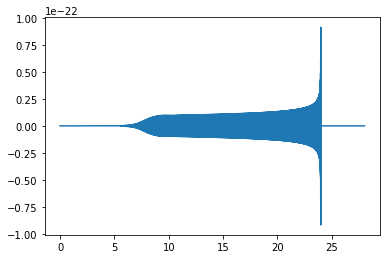

In [6]:
sample_rate=4096
t=np.arange(0,400,1/sample_rate)

try:
    d0 =injections_BBH[2][1]
    t0 = np.arange(0,len(d0)/sample_rate,1/sample_rate)
    plt.plot(t0,d0)
    plt.show()
except:
    pass

In [7]:
num_BNS_injections=len(injections_BNS)
num_BBH_injections=len(injections_BBH)

print(num_BNS_injections)
print(num_BBH_injections)
print(len(injections_BNS_check))
print(len(injections_BBH_check))


BNS_data=[]
BBH_data=[]
BNS_check_data=[]
BBH_check_data=[]
train_labels=[]
check_labels=[]
t0=50
tl=3

for i in range(len(injections_BNS)):
    d = np.array(injections_BNS[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_data.append(gwpapa.twindow(t,d,t0,tl))
    train_labels.append(1)
    
for i in range(len(injections_BNS_check)):
    d = np.array(injections_BNS_check[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BNS_check_data.append(gwpapa.twindow(t,d,t0,tl))
    check_labels.append(1)
 
t0=7
tl=3

for i in range(len(injections_BBH)):
    d = np.array(injections_BBH[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_data.append(gwpapa.twindow(t,d,t0,tl))
    train_labels.append(0)
    
for i in range(len(injections_BBH_check)):
    d = np.array(injections_BBH_check[i][1])
    t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    BBH_check_data.append(gwpapa.twindow(t,d,t0,tl))
    check_labels.append(0)

print('done')

180
180
20
20
done


In [8]:
print(BNS_data)
print(len(BNS_data))
print(len(BBH_data[0]),len(BBH_data[1]))
print(BBH_data)

[array([-2.06862751e-25, -1.81610889e-25, -1.56294786e-25, ...,
       -5.44886597e-25, -5.24390312e-25, -5.03501357e-25]), array([-2.21301402e-25, -2.40051405e-25, -2.58587137e-25, ...,
        5.95188886e-25,  5.85645136e-25,  5.75572473e-25]), array([ 4.65795781e-25,  4.79461976e-25,  4.92746905e-25, ...,
       -5.09511009e-25, -4.96641290e-25, -4.83269260e-25]), array([-3.21160776e-25, -2.97715088e-25, -2.74097034e-25, ...,
       -7.80131190e-25, -7.70850812e-25, -7.60946091e-25]), array([-4.27847341e-25, -4.43002761e-25, -4.57734248e-25, ...,
        4.85255961e-25,  4.71086175e-25,  4.56518122e-25]), array([8.06312285e-25, 8.11054934e-25, 8.14943145e-25, ...,
       1.01522525e-25, 1.26751478e-25, 1.51762013e-25]), array([5.77635338e-25, 5.89042354e-25, 5.99898463e-25, ...,
       3.28121191e-25, 3.46643739e-25, 3.64835264e-25]), array([-6.80108159e-25, -6.71840279e-25, -6.63070885e-25, ...,
        7.43525935e-26,  9.65078419e-26,  1.18466891e-25]), array([-2.90736496e-25, -3.

0.0 2.99951171875


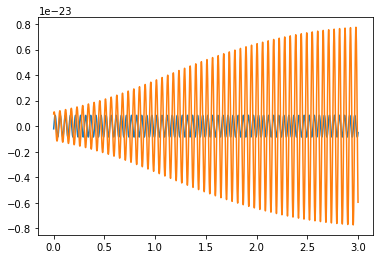

[ 9.60307706e-25  9.75685374e-25  9.90267324e-25 ... -5.66669095e-24
 -5.81633711e-24 -5.96124289e-24]


In [9]:
t=np.arange(0,len(BNS_data[0])/sample_rate,1/sample_rate)
t2=np.arange(0,len(BBH_data[0])/sample_rate,1/sample_rate)
print(0.0,max(t))
plt.plot(t,BNS_data[0])
plt.plot(t2,BBH_data[0])
plt.show()

print(BBH_data[0])

In [10]:
class_names=["BNS","BBH"]


In [11]:
BNS_data=np.array(BNS_data)
BBH_data=np.array(BBH_data)
BNS_check_data=np.array(BNS_check_data)
BBH_check_data=np.array(BBH_check_data)
train_labels=np.array(train_labels)
check_labels=np.array(check_labels)
BNS_data.shape
BBH_data.shape
train_labels=np.array(train_labels)
BNS_check_data.shape
BBH_check_data.shape

train_data=np.concatenate((BNS_data,BBH_data),axis=0)
check_data=np.concatenate((BNS_check_data,BBH_check_data),axis=0)


train_data = train_data / np.linalg.norm(train_data)
check_data = check_data / np.linalg.norm(check_data)

train_data.shape
#print(BNS_data.type)

print(train_data.dtype)

float64


In [12]:
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

print(model)

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model)
print(train_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
model.fit(train_data, train_labels, epochs=50)

Epoch 1/50
360/360 [==============================] - 3s 7ms/step - loss: 0.6914 - acc: 0.5611
Epoch 2/50
360/360 [==============================] - 1s 3ms/step - loss: 0.6726 - acc: 0.7222
Epoch 3/50
360/360 [==============================] - 1s 3ms/step - loss: 0.6488 - acc: 0.7361
Epoch 4/50
360/360 [==============================] - 1s 3ms/step - loss: 0.6184 - acc: 0.7639
Epoch 5/50
360/360 [==============================] - 1s 3ms/step - loss: 0.5851 - acc: 0.7944
Epoch 6/50
360/360 [==============================] - 1s 3ms/step - loss: 0.5514 - acc: 0.7833
Epoch 7/50
360/360 [==============================] - 1s 3ms/step - loss: 0.5148 - acc: 0.8194
Epoch 8/50
360/360 [==============================] - 1s 4ms/step - loss: 0.4801 - acc: 0.8417
Epoch 9/50
360/360 [==============================] - 1s 4ms/step - loss: 0.4468 - acc: 0.8639
Epoch 10/50
360/360 [==============================] - 1s 4ms/step - loss: 0.4152 - acc: 0.8694
Epoch 11/50
360/360 [============================

In [15]:
test_loss, test_acc = model.evaluate(check_data,check_labels)

print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

40/40 [==============================] - 0s 6ms/step
Test accuracy: 0.8
Test Loss: 0.5363540172576904


In [16]:
stop = timeit.default_timer()

In [17]:
acttime=stop - start

print(str(acttime)+' seconds')
print(0.0,str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

1426.2415983720057 seconds
0.0 23.770693306200094 minutes
0.39617822177000156 hours


In [18]:
predictions = model.predict(check_data)

In [19]:
print(predictions[0],predictions[-1])
print(check_labels[0],check_labels[-1])
#print(t)

[0.09435631 0.9056437 ] [1.000000e+00 7.770337e-12]
1 0


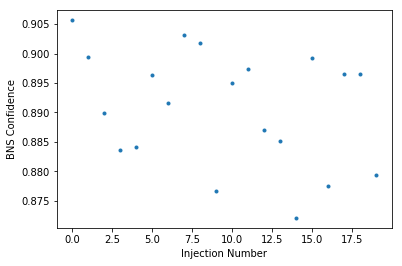

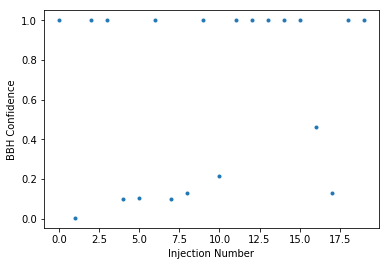

In [20]:
plt.plot(predictions[0:20,1],'.')
#plt.plot(predictions[:,1])
plt.ylabel('BNS Confidence')
plt.xlabel('Injection Number')
plt.show()

plt.plot(predictions[20:40,0],'.')
#plt.plot(predictions[:,1])
plt.ylabel('BBH Confidence')
plt.xlabel('Injection Number')
plt.show()